In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv(r"E:\PGDA 41\Machine Learning\Assignment\11-05-2025\Customer churn\customer_churn.csv")
df.drop("CustomerID", axis=1, inplace=True)
df.head()

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,25,Male,12,5,1,0,Basic,Short,200,5,0
1,45,Female,24,3,5,2,Premium,Long,900,20,1
2,30,Male,6,4,2,1,Basic,Short,300,10,0
3,50,Female,36,2,6,3,Premium,Long,1200,30,1
4,35,Male,18,6,0,0,Basic,Short,500,15,0


In [12]:
label_cols = ['Gender', 'Subscription Type', 'Contract Length']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [14]:
X = df.drop("Churn", axis=1)
y = df["Churn"]

# 📊 Step 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [18]:
y_pred = clf.predict(X_test)

In [20]:
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📉 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.75

📉 Confusion Matrix:
 [[1 1]
 [0 2]]

📋 Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      1.00      0.80         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4



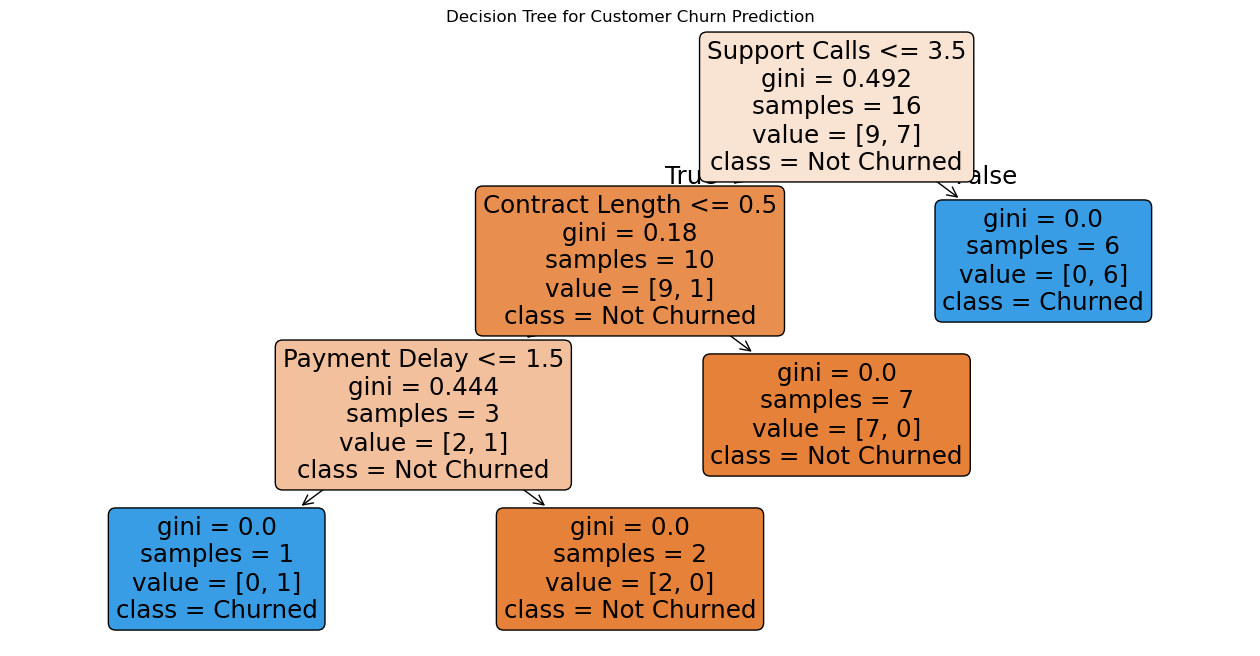

In [22]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Churned', 'Churned'], filled=True, rounded=True)
plt.title("Decision Tree for Customer Churn Prediction")
plt.show()